Data munging and plotting

In [ ]:
import os
import pandas as pd
import seaborn as sns

Read a csv

In [49]:
f="liv_pop.csv"
df=pd.read_csv(f,index_col="GeographyCode")
print(f)

liv_pop.csv


Top 5 values

In [61]:
df.head() 

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


Bottom 5 values

In [7]:
df.tail()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7
E01033767,1003,29,29,5,1
E01033768,1016,69,111,21,6


Getting an overview of the table

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Europe                          298 non-null    int64
 1   Africa                          298 non-null    int64
 2   Middle East and Asia            298 non-null    int64
 3   The Americas and the Caribbean  298 non-null    int64
 4   Antarctica and Oceania          298 non-null    int64
dtypes: int64(5)
memory usage: 14.0+ KB


Getting an overview of the values of the table

In [11]:
df.describe()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
count,298.00000,298.000000,298.000000,298.000000,298.000000
mean,1462.38255,29.818792,62.909396,8.087248,1.949664
std,248.67329,51.606065,102.519614,9.397638,2.168216
min,731.00000,0.000000,1.000000,0.000000,0.000000
25%,1331.25000,7.000000,16.000000,2.000000,0.000000
50%,1446.00000,14.000000,33.500000,5.000000,1.000000
75%,1579.75000,30.000000,62.750000,10.000000,3.000000
max,2551.00000,484.000000,840.000000,61.000000,11.000000


Transposed

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Europe,298.0,1462.382550,248.673290,731.0,1331.25,1446.0,1579.75,2551.0
Africa,298.0,29.818792,51.606065,0.0,7.00,14.0,30.00,484.0
Middle East and Asia,298.0,62.909396,102.519614,1.0,16.00,33.5,62.75,840.0
The Americas and the Caribbean,298.0,8.087248,9.397638,0.0,2.00,5.0,10.00,61.0
Antarctica and Oceania,298.0,1.949664,2.168216,0.0,0.00,1.0,3.00,11.0


Obtain minimum value

In [17]:
df.min()

Europe                            731
Africa                              0
Middle East and Asia                1
The Americas and the Caribbean      0
Antarctica and Oceania              0
dtype: int64

Obtain minimum value for the column `Europe`

In [19]:
df['Europe'].min()

731

Obtain standard deviation for the row `E01006512`

In [21]:
df.loc['E01006512', :].std()

457.8842648530303

calculate the total population by area

In [79]:
total = df['Europe'] + df['Africa'] + df['Middle East and Asia'] + \
        df['The Americas and the Caribbean'] + df['Antarctica and Oceania']
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

calculate the total population by area another option

In [81]:
total=df.sum(axis=1)
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

Add new column variable to table

In [83]:
df['Total']=total
df.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


New column with defined values

In [85]:
df['ones']=1
df.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,1
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


change specific value

In [87]:
df.loc['E01006512', 'ones'] = 3
df.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,3
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


Delete a column

In [89]:
del df['ones']
df.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


Index-based querying

In [91]:
eu_tot_first4 = df.loc[['E01006512', 'E01006513', 'E01006514', 'E01006515'], \
                      ['Total', 'Europe']]
eu_tot_first4

,Total,Europe
GeographyCode,,
E01006512,1880,910
E01006513,2941,2225
E01006514,2108,1786
E01006515,1208,974


Querying based on conditions

 areas with more than 2,500 people in Total

In [93]:
m25k = df.loc[df['Total'] > 2500, :]
m25k

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


areas where there are no more than 750 Europeans

In [95]:
m75=df.loc[df['Europe']<750,:]
m75

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033757,731,39,223,29,3,1025


areas with exactly ten person from Antarctica and Oceania

In [97]:
oneOA = df.loc[df['Antarctica and Oceania'] == 10, :]
oneOA

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006679,1353,484,354,31,10,2232


areas where European population is less than half the population

In [103]:
eu_lth = df.loc[(df['Europe'] * 100/ df['Total']) < 50, :]
eu_lth

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880


Sorting

In [105]:
df_pop_sorted = df.sort_values('Total', ascending=False)
df_pop_sorted.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


Plotting

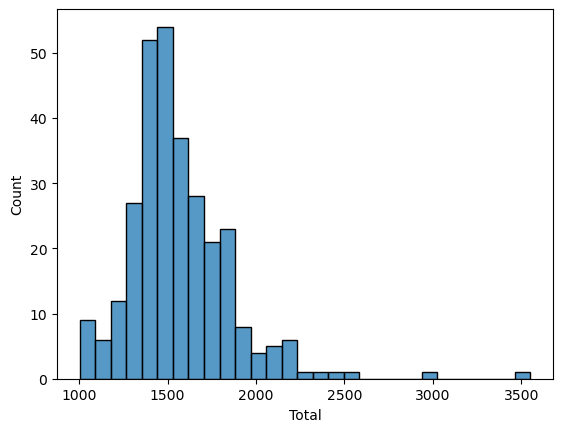

In [113]:
_=sns.histplot(df['Total'],kde=False)

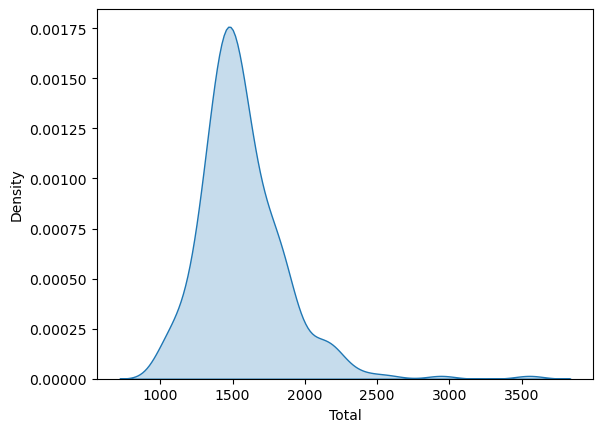

In [119]:
_ = sns.kdeplot(df['Total'], fill=True)

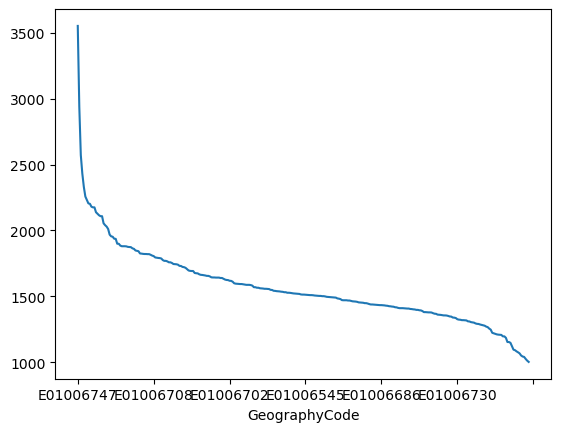

In [121]:
_ = df['Total'].sort_values(ascending=False).plot()

Remove NaN values

In [129]:
data_clean=df.dropna()
data_clean

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696
...,...,...,...,...,...,...
E01033764,2106,32,49,15,0,2202
E01033765,1277,21,33,17,3,1351
E01033766,1028,12,20,8,7,1075


Fill NaN values

In [135]:
df.fillna(-9999)
df

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696
...,...,...,...,...,...,...
E01033764,2106,32,49,15,0,2202
E01033765,1277,21,33,17,3,1351
E01033766,1028,12,20,8,7,1075


Write file

In [ ]:
dt="data_final.csv"
df_clean.to_csv(dt,sep=",")